In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

import pickle


In [2]:
!python --version

Python 3.9.13


In [15]:
#hand_df = pd.read_csv("data/sensorFile.csv", na_values=['?'])
hand_df = pd.read_csv("data/sensorFile (2).csv", na_values=['?'])
#hand_df_test = pd.read_csv("data/sensorFile_Michael.csv", na_values=['?'])
hand_df_test = pd.read_csv("data/Newglove_person1.csv", na_values=['?'])

#hand_df = hand_df._get_numeric_data()

hand_df = hand_df.fillna(0)
hand_df = hand_df.drop([0])
hand_df = hand_df.drop(['GyroX','GyroY','GyroZ'], axis = 1)

hand_df_test = hand_df_test.fillna(0)
hand_df_test = hand_df_test.drop([0])
hand_df_test = hand_df_test.drop(['GyroX','GyroY','GyroZ'], axis = 1)

y = hand_df['Gesture']
X = hand_df.drop(['Gesture'], axis = 1)

y_test = hand_df_test['Gesture']
X_test = hand_df_test.drop(['Gesture'], axis = 1)


print(X)

       Thumb  Index  Middle   Ring  Pinky
1      14326  28217   36235  31276  32500
2      14326  28161   36160  31307  32500
3      14414  28133   36160  31276  32467
4      14458  28161   36085  31244  32369
5      14518  28105   36085  31213  32369
...      ...    ...     ...    ...    ...
72005  11157  21860   24318  34060  16303
72006  11157  21882   24366  33991  16303
72007  11157  21882   24318  33991  16287
72008  11157  21882   24318  33991  16303
72009  11157  21882   24342  33991  16319

[72009 rows x 5 columns]


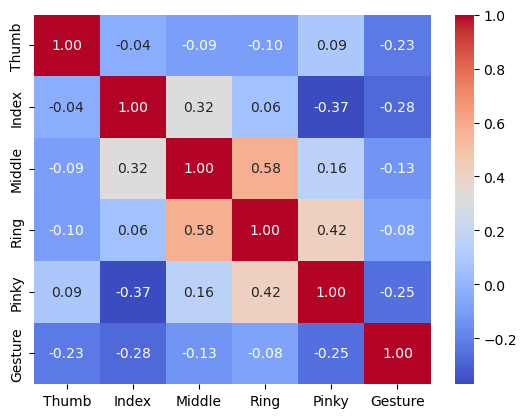

In [16]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Standarization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Save the scalers
standard_file_path = "standard_scaler.pkl"


with open(standard_file_path, 'wb') as f:
    pickle.dump(standard_scaler, f)

print("Scaler are pickled and saved to", standard_file_path)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [17]:
#Testing Standardization for Smaller Inputs

hand_df_short = pd.read_csv("data/sensorFile_Michael_test.csv", na_values=['?'])
hand_df_short = hand_df_short.fillna(0)
hand_df_short = hand_df_short.drop([0])


hand_df_short = hand_df_short.drop(['GyroX','GyroY','GyroZ'], axis = 1)

y_test1 = hand_df_short['Gesture']
X_test1 = hand_df_short.drop(['Gesture'], axis = 1)

print(X_test1)

X_standardized1 = standard_scaler.fit_transform(X_test1)

print("\n",X_standardized1)

   Thumb  Index  Middle   Ring  Pinky
1  26047  28783   35972  30591  33439
2  26099  28840   36047  30317  33168
3  26047  28754   35861  30377  33439
4  26176  28726   36010  30591  33236
5  26124  28812   36010  30347  33474
6  26124  28783   35898  30377  33439
7  26047  28754   36122  30499  33202
8  26073  28812   35861  30469  33337
9  25996  28669   35898  30469  33236

 [[-0.66977925  0.25967772  0.08947452  1.49393305  0.95710642]
 [ 0.34137136  1.42822749  0.96476877 -1.37973224 -1.42248844]
 [-0.66977925 -0.33484759 -1.20596096 -0.75046247  0.95710642]
 [ 1.83865206 -0.90887204  0.53295694  1.49393305 -0.82539453]
 [ 0.82750146  0.85420304  0.53295694 -1.06509735  1.26443417]
 [ 0.82750146  0.25967772 -0.77414913 -0.75046247  0.95710642]
 [-0.66977925 -0.33484759  1.84006301  0.52905273 -1.12394149]
 [-0.16420394  0.85420304 -1.20596096  0.21441785  0.06146555]
 [-1.66148465 -2.0774218  -0.77414913  0.21441785 -0.82539453]]


In [18]:
#save the scaler
import pickle

file_path = "standard_scaler.pkl"

with open(file_path, 'wb') as f:
    pickle.dump(standard_scaler, f)

print("StandardScaler object is pickled and saved to", file_path)

StandardScaler object is pickled and saved to standard_scaler.pkl


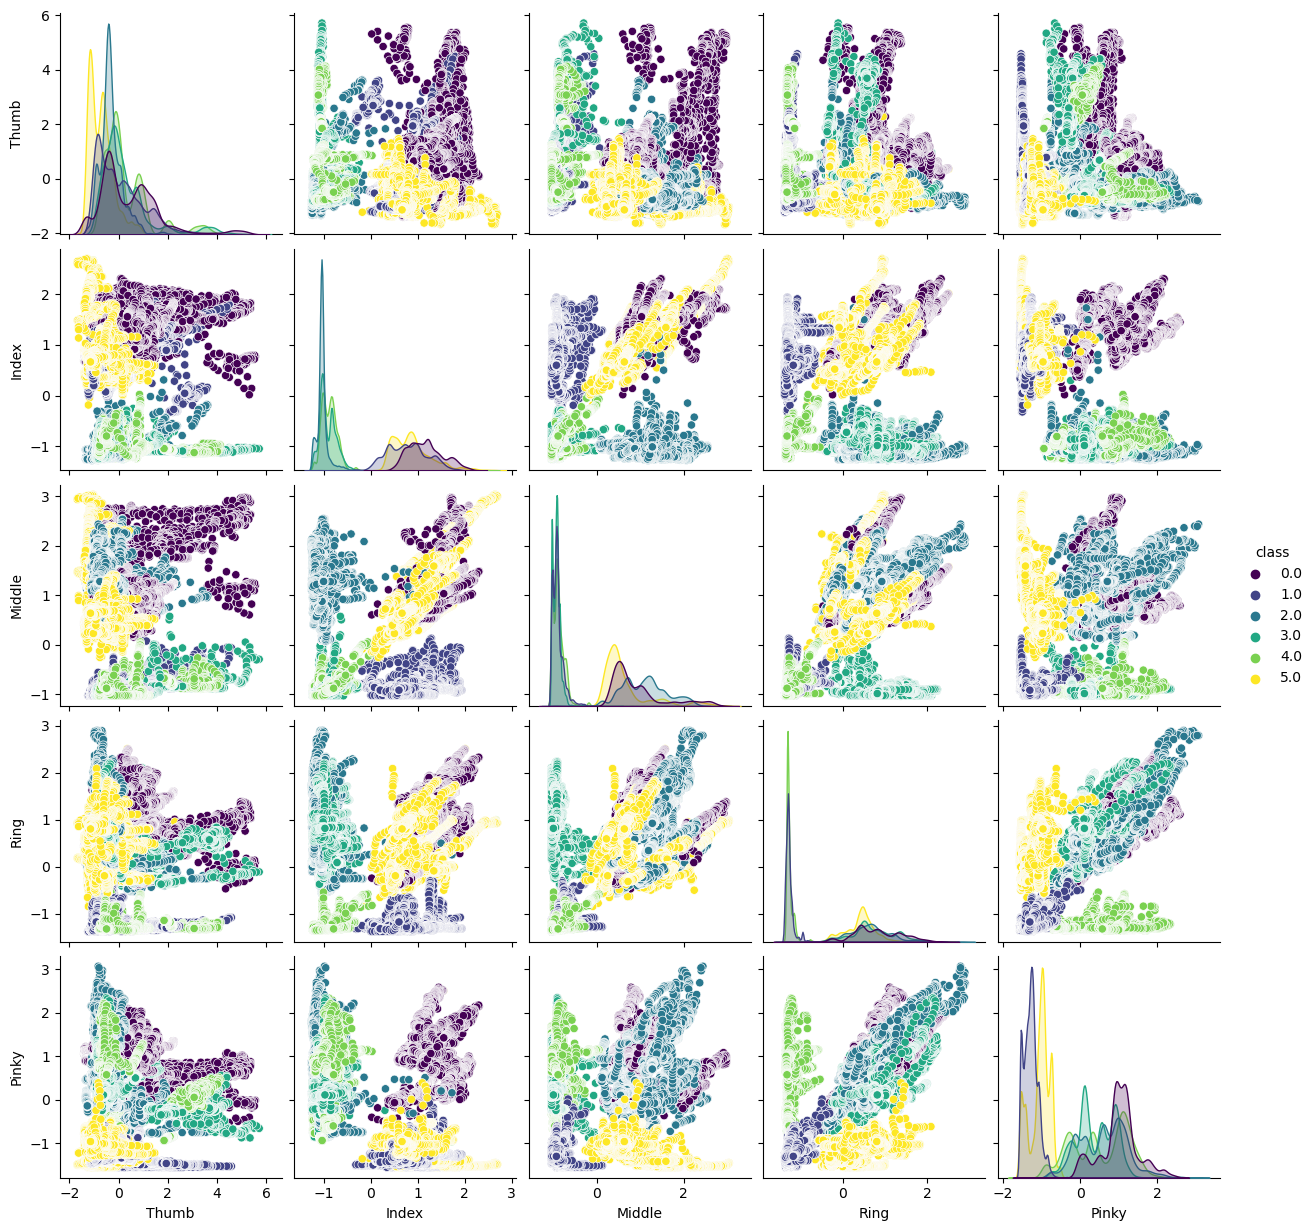

In [19]:
# Check for datapoint similarity

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_test_standardized = scaler.fit_transform(X_test)

# Create a DataFrame with standardized features
data_standardized = pd.DataFrame(X_standardized, columns=['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
data_standardized['class'] = y

sns.pairplot(data_standardized, hue='class', palette='viridis')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

best_k = None
best_accuracy = 0

X_train, X_valid, y_train, y_valid = train_test_split(X_standardized,y, train_size=0.75, random_state = 0)


X_test = X_test_standardized


print('\n k\tacc_train\tacc_valid\tacc_test\tMean CVS')

for k in range(1, 33+1, 2):
    KNN_Model = KNeighborsClassifier(n_neighbors=k)
    KNN_Model.fit(X_train, y_train)

    y_predict_valid = KNN_Model.predict(X_valid)
    y_predict_train = KNN_Model.predict(X_train)
    y_predict_test = KNN_Model.predict(X_test)
    acc_valid = accuracy_score(y_valid, y_predict_valid)
    acc_train = accuracy_score(y_train, y_predict_train)
    acc_test = accuracy_score(y_test, y_predict_test)

    if acc_valid > best_accuracy:
        best_accuracy = acc_valid
        best_k = k

    cvs = cross_val_score(KNN_Model, X_train, y_train, cv=10)
    
    print('\n', k, '\t', acc_train, '\t', acc_valid, '\t', acc_test, '\t', np.mean(cvs))

print('\nBest k:', best_k)

# Now use the best_k to train the model and make predictions
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_predict_train = best_model.predict(X_train)
y_predict_valid = best_model.predict(X_valid)
y_predict_test = best_model.predict(X_test)

acc_train = accuracy_score(y_train, y_predict_train)
acc_valid = accuracy_score(y_valid, y_predict_valid)
acc_test = accuracy_score(y_test, y_predict_test)

print('\nAccuracy on Train set:', acc_train)
print('Accuracy on Validation set:', acc_valid)
print('Accuracy on Test set:', acc_test)


 k	acc_train	acc_valid	acc_test	Mean CVS

 1 	 1.0 	 1.0 	 0.9114860864416815 	 0.9996719966648289

 3 	 0.9996720505042224 	 0.999508116084604 	 1.0 	 0.9994260277841285

 5 	 0.9994260883823891 	 0.999508116084604 	 1.0 	 0.9993440605710138

 7 	 0.9993441010084447 	 0.9992621741269061 	 1.0 	 0.9991801261447841

 9 	 0.9993441010084447 	 0.9992621741269061 	 1.0 	 0.9991801261447841

 11 	 0.9992621136345002 	 0.9992621741269061 	 1.0 	 0.9991801261447841

 13 	 0.9991801262605559 	 0.9992621741269061 	 1.0 	 0.9991801261447841

 15 	 0.9991801262605559 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 17 	 0.9990981388866115 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 19 	 0.9990981388866115 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 21 	 0.9990981388866115 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 23 	 0.9990981388866115 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 25 	 0.9990981388866115 	 0.9992621741269061 	 1.0 	 0.9990981589316694

 27 	 0.999098138

In [10]:
# Pickle the best model, you can use the same method to pickle other models
file_path = "best_knn_model.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(best_model, f)

print("Best model pickled and saved to", file_path)

Best model pickled and saved to best_knn_model.pkl


11 	 22


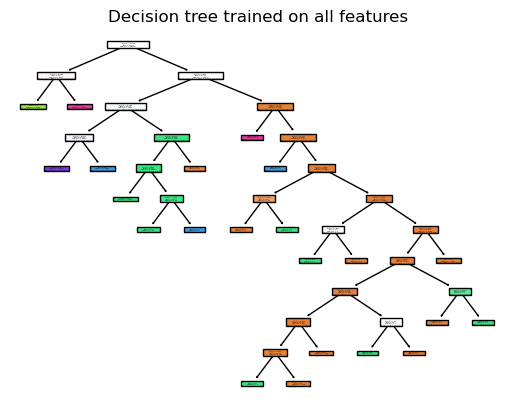

In [11]:
#Decision Tree

dts = DecisionTreeClassifier(random_state = 0)

dts.fit(X_standardized, y)

max_depth = dts.get_depth()
max_leaves = dts.get_n_leaves()

print (max_depth, '\t', max_leaves)
plt.figure()
plot_tree(dts, filled=True)
plt.title("Decision tree trained on all features")
plt.show()


d	Mean CVS	Test Set Accuracy

1 	 0.3550389680295082 	 0.3262551581843191
2 	 0.6872037140777062 	 0.6779573590096286
3 	 0.8382195137255615 	 0.7925550206327373
4 	 0.9878844166437976 	 0.9609697386519945
5 	 0.9878229160287916 	 0.9798830811554333
6 	 0.9862239000386316 	 0.9465268225584594
7 	 0.9862239000386316 	 0.9463548830811555
8 	 0.985178389583527 	 0.9415405777166438
9 	 0.985178389583527 	 0.9415405777166438
10 	 0.985178389583527 	 0.9351788170563962
11 	 0.9849940011385362 	 0.9351788170563962


best d 	 higest cross validation score

4 	 0.9878844166437976 



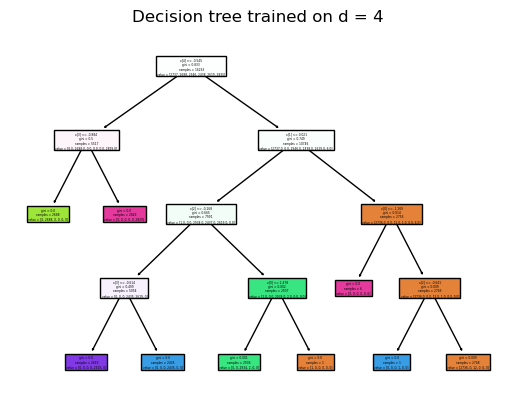

In [12]:
# tunning tree depth

X_train = X_standardized
y_train = y

X_test = X_test_standardized

best_cvs=0
best_d=0

print("\nd\tMean CVS\tTest Set Accuracy\n")

for d in range (1, max_depth+1): 
    dts = DecisionTreeClassifier(max_depth = d, random_state = 0)
    dts.fit(X_train, y_train)
    cvs = cross_val_score(dts, X_train, y_train, cv=10)
    test_score = dts.score(X_test, y_test)
    print(d,'\t',np.mean(cvs),'\t',test_score)
    if best_cvs<np.mean(cvs):
        best_cvs=np.mean(cvs)
        best_d=d
 
print('\n\nbest d', '\t', 'higest cross validation score\n')
print(best_d, '\t', best_cvs, '\n')

# train dts on best d
dts = DecisionTreeClassifier(max_depth = best_d, random_state = 0)
dts.fit(X_standardized, y)

plt.figure()
plot_tree(dts, filled=True)
plt.title(f"Decision tree trained on d = {best_d}")
plt.show()

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_standardized,y, train_size=0.75, random_state = 0)


X_test = X_test_standardized

svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

cvs = cross_val_score(svm, X_standardized, y, cv = 10)

print("default SVC cvs:",cvs)

default SVC cvs: [1.         1.         0.99938537 1.         0.99876999 0.99507995
 0.99692497 1.         0.99630996 1.        ]


In [14]:
# Define hyperparameters to try
C_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]
kernel_values = ['linear', 'rbf']
gamma_values = ['scale', 'auto']

best_accuracy = 0
best_params = None

# Iterate over hyperparameter combinations
for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            svm = SVC(C=C, kernel=kernel, gamma=gamma)
            svm.fit(X_train, y_train)


            y_pred_valid = svm.predict(X_valid)
            valid_accuracy = accuracy_score(y_valid, y_pred_valid)

            print(f"C={C}, Kernel={kernel}, Gamma={gamma}, Validation Accuracy={valid_accuracy}")

            if valid_accuracy > best_accuracy:
                best_accuracy = valid_accuracy
                best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}

# Train the final model with the best hyperparameters on the combined training and validation sets
final_svm = SVC(**best_params)
final_svm.fit(np.concatenate((X_train, X_valid)), np.concatenate((y_train, y_valid)))

# Evaluate on the test set
y_pred_test = final_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")
print("Best Hyperparameters:", best_params)

C=0.001, Kernel=linear, Gamma=scale, Validation Accuracy=0.9990162321692081
C=0.001, Kernel=linear, Gamma=auto, Validation Accuracy=0.9990162321692081
C=0.001, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9687653713723561
C=0.001, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9687653713723561
C=0.01, Kernel=linear, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.01, Kernel=linear, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.01, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9982784062961141
C=0.01, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9982784062961141
C=0.1, Kernel=linear, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.1, Kernel=linear, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.1, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.1, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.5, Kernel=linear, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.5, Kernel=linear, Gamma=auto, Validation Accur

In [15]:
#1 vs. Rest
from sklearn.multiclass import OneVsRestClassifier

X_train = X_standardized
y_train = y

X_test = X_test_standardized

# Define hyperparameters to try
C_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]
kernel_values = ['linear', 'rbf']
gamma_values = ['scale', 'auto']

best_accuracy = 0
best_params = None

# Iterate over hyperparameter combinations
for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            clf = OneVsRestClassifier(SVC(C=C, kernel=kernel, gamma=gamma))
            clf.fit(X_train, y_train)

            y_pred_valid = clf.predict(X_valid)
            valid_accuracy = accuracy_score(y_valid, y_pred_valid)

            print(f"C={C}, Kernel={kernel}, Gamma={gamma}, Validation Accuracy={valid_accuracy}")

            if valid_accuracy > best_accuracy:
                best_accuracy = valid_accuracy
                best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}

# Train the final model with the best hyperparameters on the combined training and validation sets
final_clf = OneVsRestClassifier(SVC(**best_params))
final_clf.fit(np.concatenate((X_train, X_valid)), np.concatenate((y_train, y_valid)))

# Evaluate on the test set
y_pred_test = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")
print("Best Hyperparameters:", best_params)


C=0.001, Kernel=linear, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.001, Kernel=linear, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.001, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9987702902115101
C=0.001, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9987702902115101
C=0.01, Kernel=linear, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.01, Kernel=linear, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.01, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9987702902115101
C=0.01, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9987702902115101
C=0.1, Kernel=linear, Gamma=scale, Validation Accuracy=0.9990162321692081
C=0.1, Kernel=linear, Gamma=auto, Validation Accuracy=0.9990162321692081
C=0.1, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9992621741269061
C=0.1, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9992621741269061
C=0.5, Kernel=linear, Gamma=scale, Validation Accuracy=0.9987702902115101
C=0.5, Kernel=linear, Gamma=auto, Validation Accur

In [23]:
# 1 vs. 1
from sklearn.multiclass import OneVsOneClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X_standardized,y, train_size=0.75, random_state = 0)

X_test = X_test_standardized

# Define hyperparameters to try
C_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]
kernel_values = ['linear', 'rbf']
gamma_values = ['scale', 'auto']

best_accuracy = 0
best_params = None

# Iterate over hyperparameter combinations
for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            clf1 = OneVsOneClassifier(SVC(C=C, kernel=kernel, gamma=gamma))
            clf1.fit(X_train, y_train)
            y_pred_valid = clf1.predict(X_valid)
            valid_accuracy = accuracy_score(y_valid, y_pred_valid)

            print(f"C={C}, Kernel={kernel}, Gamma={gamma}, Validation Accuracy={valid_accuracy}")

            if valid_accuracy > best_accuracy:
                best_accuracy = valid_accuracy
                best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}

# Train the final model with the best hyperparameters on the combined training and validation sets
final_clf1 = OneVsOneClassifier(SVC(**best_params))
final_clf1.fit(np.concatenate((X_train, X_valid)), np.concatenate((y_train, y_valid)))

# Evaluate on the test set
y_pred_test = final_clf1.predict(X_test)
y_pred_train = final_clf1.predict(X_train)
y_pred_valid = final_clf1.predict(X_valid)
train_accuracy = accuracy_score(y_train, y_pred_train)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTrain Set Accuracy with Best Hyperparameters: {train_accuracy}")
print(f"\nValid Set Accuracy with Best Hyperparameters: {valid_accuracy}")
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")
print("Best Hyperparameters:", best_params)




C=0.001, Kernel=linear, Gamma=scale, Validation Accuracy=0.9995000833194467
C=0.001, Kernel=linear, Gamma=auto, Validation Accuracy=0.9995000833194467
C=0.001, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9987779814475365
C=0.001, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9978892406821085
C=0.01, Kernel=linear, Gamma=scale, Validation Accuracy=0.9993889907237683
C=0.01, Kernel=linear, Gamma=auto, Validation Accuracy=0.9993889907237683
C=0.01, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9992778981280898
C=0.01, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9992778981280898
C=0.1, Kernel=linear, Gamma=scale, Validation Accuracy=0.9995556296172861
C=0.1, Kernel=linear, Gamma=auto, Validation Accuracy=0.9995556296172861
C=0.1, Kernel=rbf, Gamma=scale, Validation Accuracy=0.9995556296172861
C=0.1, Kernel=rbf, Gamma=auto, Validation Accuracy=0.9995556296172861
C=0.5, Kernel=linear, Gamma=scale, Validation Accuracy=0.9996667222129645
C=0.5, Kernel=linear, Gamma=auto, Validation Accur

In [29]:
best_params = {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}
final_clf1 = OneVsOneClassifier(SVC(**best_params))

final_clf1.fit(X_standardized,y)

file_path = "best_SVM_1v1_model.pkl"
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

y_pred_train = loaded_model.predict(X_standardized)
y_pred_test = loaded_model.predict(X_test)
train_accuracy = accuracy_score(y, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTrain Set Accuracy with Best Hyperparameters: {train_accuracy}")
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")


Train Set Accuracy with Best Hyperparameters: 0.9625741226791096

Test Set Accuracy with Best Hyperparameters: 0.9815362931642001


In [25]:
#model persistance
from tempfile import mkdtemp
import joblib

savedir = mkdtemp()

import os
filename = os.path.join(savedir, 'OneVsRest.joblib')
joblib.dump(final_clf, filename)  

['C:\\Users\\17539\\AppData\\Local\\Temp\\tmpj7dfmqzf\\OneVsRest.joblib']

In [8]:
from joblib import load

# Specify the path to the joblib file
file_path = 'OneVsRest.joblib'

# Load the joblib file
loaded_data = load(file_path)

In [ ]:


y_pred_test = loaded_data.predict(X_test_input)

In [4]:
loaded_svc = joblib.load(filename)
y_pred_test = loaded_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")

NameError: name 'filename' is not defined

In [ ]:
filename1 = os.path.join(savedir, 'dts.joblib')
joblib.dump(dts, filename1)  

In [ ]:
loaded_svc = joblib.load(filename1)
y_pred_test = loaded_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")

In [ ]:
filename2 = os.path.join(savedir, 'OneVsOne.joblib')
joblib.dump(final_clf1, filename2)  

In [ ]:
loaded_svc = joblib.load(filename2)
y_pred_test = loaded_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")

In [ ]:
filename3 = os.path.join(savedir, 'SVM.joblib')
joblib.dump(final_svm, filename3)  

In [ ]:
loaded_svc = joblib.load(filename3)
y_pred_test = loaded_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")

In [ ]:
filename4 = os.path.join(savedir, 'KNN.joblib')
joblib.dump(best_model, filename4)  

In [53]:
loaded_svc = joblib.load(filename4)
y_pred_test = loaded_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Set Accuracy with Best Hyperparameters: {test_accuracy}")


Test Set Accuracy with Best Hyperparameters: 0.9402427637721755
